## Banco Relacional, Python e SQL para Análise de Dados

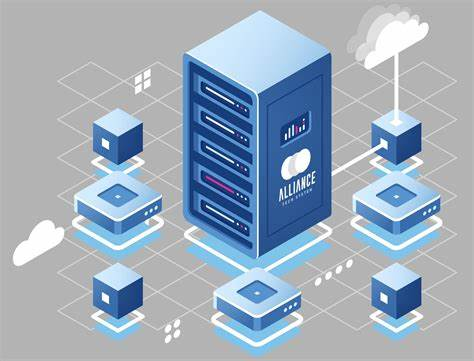

In [7]:
from IPython.display import Image
Image(r"C:\Users\aliso\OneDrive\Área de Trabalho\Projetos\Banco_de_Dados.jpg", width=750)

##### Definição do problema de negócio

Temos  em  mãos  um  arquivo  com  dados  de  pacientes  que  desenvolveram  ou  não diabetes. 
Precisamos gerar uma amostra de dados com os pacientes com mais de 50 anos e para cada um deles 
indicar em uma nova coluna se o paciente está normal (índice de massa corpórea menor que 30) ou 
obeso (índice de massa corpórea maior ou igual a 30). Então devemos gerar um novo arquivo CSV e 
encaminhar para o Cientista de Dados. 

##### Preparação dos dados

Vamos  resolver  esse  problema  com  Banco  de  Dados,  Python
e  SQL.

Os  dados  serão inicialmente carregados com Linguagem Python. Faremos então uma cópia dos 
dados para um banco  de  dados  e  usaremos  Linguagem  SQL  para  as  transformações  necessárias.  

Por  fim, copiaremos  os  dados  transformados  de  volta  para  um  dataframe do  Pandas para  salvar
resultado em formato CSV.

## Instalando e carregando pacotes

In [1]:
# Verificando versão python

from platform import python_version
print('Versão da linguagem python usada neste projeto: ', python_version())

Versão da linguagem python usada neste projeto:  3.9.13


In [2]:
# Criando uma marca d'água

!pip install -q U watermark

ERROR: Could not find a version that satisfies the requirement U (from versions: none)
ERROR: No matching distribution found for U


In [4]:
# Instala o pacote iPython-sql

!pip install ipython-sql

In [5]:
!pip show ipython

Name: ipython
Version: 7.31.1
Summary: IPython: Productive Interactive Computing
Home-page: https://ipython.org
Author: The IPython Development Team
Author-email: ipython-dev@python.org
License: BSD
Location: c:\users\aliso\anaconda3\lib\site-packages
Requires: backcall, colorama, decorator, jedi, matplotlib-inline, pickleshare, prompt-toolkit, pygments, setuptools, traitlets
Required-by: import-ipynb, ipykernel, ipython-sql, ipywidgets, jupyter-console, jupyter-ui-poll, jupyterlab, jupyterthemes, spyder, spyder-kernels, watermark


In [6]:
# Importando os pacotes

import pandas as pd
import sqlite3
from datetime import datetime

In [7]:
# Versões do pacote

%reload_ext watermark
%watermark -a "Alison Araujo" -d -v -p watermark
print(f"Data de início do projeto: {datetime.today().strftime('%Y-%m-%d')}")

Author: Alison Araujo

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

watermark: 2.4.3

Data de início do projeto: 2023-11-21


# Banco Relacional, Python e SQL para Análise de Dados

In [8]:
# Criando um dataframe

df = pd.DataFrame({'nome': ['Siri', 'Alexa', 'Cortana'],
                  'idade': [28, 47, 18],
                  'cargo': ['Analista de Dados', 'Cientista de Dados', 'Engenheiro de Dados']})

In [9]:
# Visualizando o df

display(df.head())

,nome,idade,cargo
0,Siri,28,Analista de Dados
1,Alexa,47,Cientista de Dados
2,Cortana,18,Engenheiro de Dados


In [10]:
# Apagando o banco de dados

!del "C:\Users\aliso\OneDrive\Desktop\formacao_fad\PYTHON\Cap02\database\dbprojeto1.db"

In [11]:
# Criando conexão com o banco de dados sqlite

cnn = sqlite3.connect("C:\\Users\\aliso\\OneDrive\\Desktop\\formacao_fad\\PYTHON\\Cap02\\database\\dbprojeto1.db")

In [12]:
# Inserindo o dataframe dentro do banco de dados

df.to_sql('funcionarios', cnn) # funcionario é o nome do nosso dataframe.

In [13]:
# Carregamos a extensão SQL

 # Trazemos um operador mágico do jupyter, carregamos a extensão definida que é do ipython_sql.

%load_ext sql

In [14]:
# Fornecendo ao jupyter notebook o path do banco de dados.

# OBS: em outrora fora feito a conexão e não a definição. Uma coisa é conectar com um banco de dados, outra é definir um já existente.

%sql sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db

# Queries SQL

In [15]:
%%sql

SELECT * FROM funcionarios

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


index,nome,idade,cargo
0,Siri,28,Analista de Dados
1,Alexa,47,Cientista de Dados
2,Cortana,18,Engenheiro de Dados


In [18]:
%%sql

SELECT COUNT(*) AS contagem FROM funcionarios

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


contagem
3


In [19]:
%%sql

SELECT AVG(idade) AS media_idade FROM funcionarios 

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


media_idade
31.0


# Dataset diabetes

Temos em mãos um arquivo com dados de pacientes que desenvolveram ou não diabetes. Precisamos gerar uma amostra de dados com os pacientes com mais de 50 anos e para cada um deles indicar em uma nova coluna se o paciente está normal (índice de massa corpórea menor que 30) ou obeso (índice de massa corpórea maior ou igual a 30). Então devemos gerar um novo arquivo CSV e encaminhar para o Cientista de Dados.

In [20]:
# Carregando o dataframe

df = pd.read_csv(r'C:\Users\aliso\OneDrive\Desktop\formacao_fad\PYTHON\Cap02\dataset\diabetes.csv')

In [21]:
df.shape

(768, 9)

In [22]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
665,1,112,80,45,132,34.8,0.217,24,0
499,6,154,74,32,193,29.3,0.839,39,0
415,3,173,84,33,474,35.7,0.258,22,1
500,2,117,90,19,71,25.2,0.313,21,0
7,10,115,0,0,0,35.3,0.134,29,0
114,7,160,54,32,175,30.5,0.588,39,1
710,3,158,64,13,387,31.2,0.295,24,0
626,0,125,68,0,0,24.7,0.206,21,0
390,1,100,66,29,196,32.0,0.444,42,0
50,1,103,80,11,82,19.4,0.491,22,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
# Inserindo o dataframe dentro do banco de dados com a conexão já aberta

df.to_sql('diabetes', cnn)

In [26]:
%%sql

SELECT COUNT(*) AS contagem_registros FROM diabetes

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


contagem_registros
768


In [27]:
%%sql

CREATE TABLE pacientes (Pregnancies INT,
                       Glucose INT,
                       BloodPressure INT,
                       SkinThickness INT,
                       Insulin INT,
                       BMI DECIMAL(8, 2),
                       DiabetesPedigreeFunction DECIMAL(8,2),
                       Age INT,
                       Outcome INT);

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


[]

##### Inserção de uma nova coluna para realizar a categorizacao

In [28]:
%%sql

ALTER TABLE pacientes
ADD COLUMN Perfil VARCHAR(10);

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


[]

##### Checando a criação da nova coluna

In [29]:
%%sql

SELECT * FROM pacientes
LIMIT 0

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil


##### Inserindo dados com base no filtro que desejamos realizar

In [30]:
%%sql

INSERT INTO pacientes(Pregnancies,
                     Glucose,
                     BloodPressure,
                     SkinThickness,
                     Insulin,
                     BMI,
                     DiabetesPedigreeFunction,
                     Age,
                     Outcome,
                     Perfil)

SELECT
    Pregnancies,
    Glucose,
    BloodPressure,
    SkinThickness,
    Insulin,
    DiabetesPedigreeFunction,
    Age,
    Outcome,
    BMI,
    CASE
        WHEN BMI >= 30 THEN 'Normal'
        WHEN BMI < 30 THEN 'Obeso'
    END AS Perfil
FROM diabetes
WHERE Age > 50
GROUP BY 1, 2, 3, 4, 5, 6, 7, 8, 9
ORDER BY BMI DESC;

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
81 rows affected.


[]

In [31]:
%%sql

SELECT * FROM pacientes

 * sqlite:///C:/Users/aliso/OneDrive/Desktop/formacao_fad/PYTHON/Cap02/database/dbprojeto1.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
0,173,78,32,265,1.159,58,0,46.5,Normal
9,171,110,24,240,0.721,54,1,45.4,Normal
5,187,76,27,207,1.034,53,1,43.6,Normal
2,109,92,0,0,0.845,54,0,42.7,Normal
5,103,108,37,0,0.305,65,0,39.2,Normal
12,140,82,43,325,0.528,58,1,39.2,Normal
11,127,106,0,0,0.19,51,0,39,Normal
4,146,78,0,0,0.52,67,1,38.5,Normal
5,162,104,0,0,0.151,52,1,37.7,Normal
6,103,72,32,190,0.324,55,0,37.7,Normal


# Carregando os dados no Pandas e Salvando em CSV

In [32]:
query = cnn.execute("SELECT * FROM pacientes")
query

In [33]:
# List comprehension para checar as colunas

cols = [coluna[0] for coluna in query.description]
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Perfil']

In [34]:
# Gerando o dataframe a partir do registro na memória.

# OBS: rodar uma única vez, vide que o registro será apagado da memória após execução

resultado = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
resultado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
0,0,173,78,32,265,1.159,58,0,46.5,Normal
1,9,171,110,24,240,0.721,54,1,45.4,Normal
2,5,187,76,27,207,1.034,53,1,43.6,Normal
3,2,109,92,0,0,0.845,54,0,42.7,Normal
4,5,103,108,37,0,0.305,65,0,39.2,Normal
...,...,...,...,...,...,...,...,...,...,...
76,3,128,78,0,0,0.268,55,0,21.1,Obeso
77,2,119,0,0,0,0.832,72,0,19.6,Obeso
78,6,129,90,7,326,0.582,60,0,19.6,Obeso
79,5,136,82,0,0,0.640,69,0,0.0,Obeso


In [36]:
# Shape do dataframe

resultado.shape

(81, 10)

In [42]:
# Visualização do dataframe

resultado.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
39,2,197,70,45,543,0.158,53,1,30.5,Normal
55,1,135,54,0,0,0.687,62,0,26.7,Obeso
34,4,145,82,18,0,0.235,70,1,32.5,Normal
74,0,161,50,0,0,0.254,65,0,21.9,Obeso
45,8,124,76,24,600,0.687,52,1,28.7,Obeso
6,11,127,106,0,0,0.190,51,0,39.0,Normal
56,6,166,74,0,0,0.304,66,0,26.6,Obeso
38,4,146,92,0,0,0.539,61,1,31.2,Normal
22,7,150,78,29,126,0.692,54,1,35.2,Normal
4,5,103,108,37,0,0.305,65,0,39.2,Normal


# Salvando o arquivo final em CSV

In [43]:
resultado.to_csv(r'C:\Users\aliso\OneDrive\Desktop\formacao_fad\PYTHON\Cap02\dataset\pacientes.csv', index = False)

# Fim